## The Spark Foundation - Grip-Data Science and Busniess Analyltics  - April 2023

## TASK-1 : Prediction using supervised ML

### Dataset used: student scores

## predict the percentage of a student based on the no.of study hours

## What will be predicted score if a student studies for 9.25 hrs day?

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data file in csv dataset in pandas

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualize the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

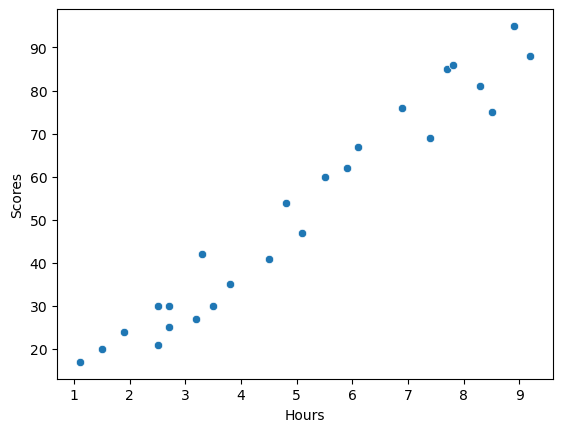

In [5]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])



<AxesSubplot:xlabel='Hours', ylabel='Scores'>

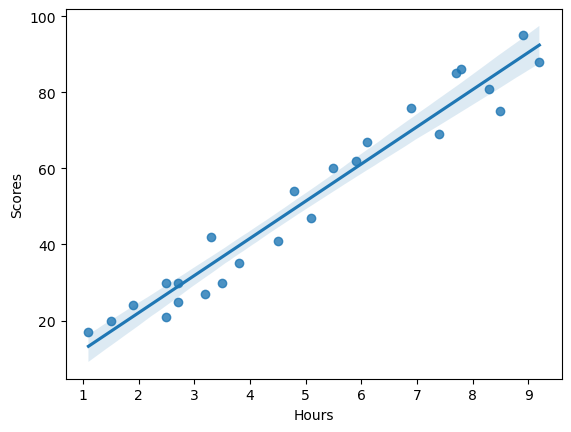

In [9]:
sns.regplot(x=df['Hours'],y=df['Scores'])

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## seperate features and target

In [8]:
hours=df[['Hours']]
scores=df['Scores']


C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

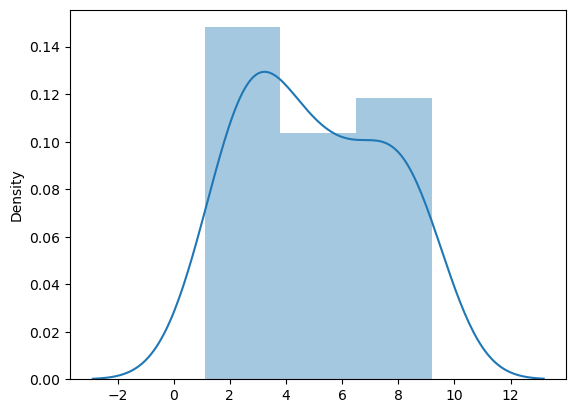

In [9]:
sns.distplot(hours)

C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

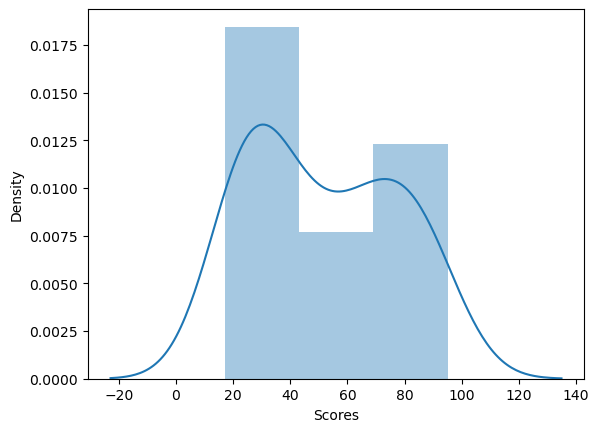

In [10]:
sns.distplot(scores)

## Train-Test split

In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size=0.2,random_state=50)

## Model Building

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

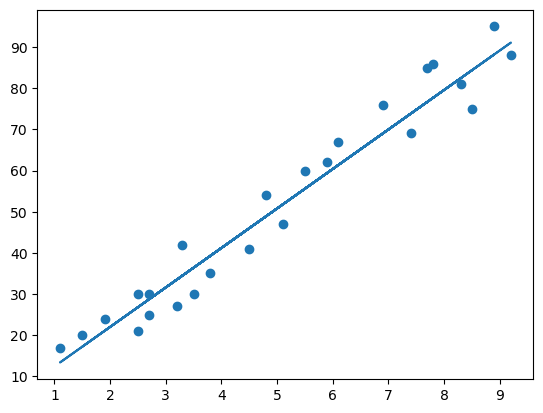

In [19]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x, line);
plt.show()
    

In [20]:
y_pred=reg.predict(x_test)

In [21]:
actual_predicted=pd.DataFrame({'Target':y_test,'predicted':y_pred})
actual_predicted

,Target,predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


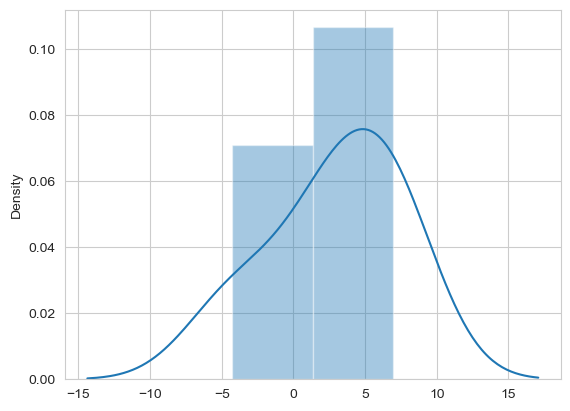

In [22]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

## what would be the predicted score if a student fr 9.25 hours/day?

In [23]:
h=9.25
s=reg.predict([[h]])
print("If a student for{} hours per day he/she will score{} %  in exam.".format(h,s))

If a student for9.25 hours per day he/she will score[91.56986604] %  in exam.


## Model Evaluation

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 score: 0.971014141329942


In [ ]:
https://youtu.be/u6qR_frA70s